# Week 10 Practice

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

## Historical Volatility

The histotical volatility of Tesla, Inc.

In [2]:
TSLA = yf.download("TSLA", start="2020-04-01", end="2021-04-02")

[*********************100%***********************]  1 of 1 completed


In [3]:
S = TSLA['Adj Close'][-1]
print('The spot price is $', round(S,2), '.')

The spot price is $ 661.75 .


In [4]:
log_return = np.log(TSLA['Adj Close'] / TSLA['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 76.4 %


## Market Volatility

The market volatility, VIX,  is the ticker symbol and the popular name for the Chicago Board Options Exchange's CBOE Volatility Index, a popular measure of the stock market's expectation of volatility based on S&P 500 index options.

In [5]:
VIX = yf.download("^VIX", start="2020-04-01", end="2021-04-02")

[*********************100%***********************]  1 of 1 completed


In [6]:
VIX

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-31,56.689999,58.750000,50.880001,53.540001,53.540001,0
2020-04-01,57.380001,60.590000,52.759998,57.060001,57.060001,0
2020-04-02,54.459999,57.240002,50.450001,50.910000,50.910000,0
2020-04-03,51.110001,52.290001,46.740002,46.799999,46.799999,0
2020-04-06,44.169998,45.730000,43.450001,45.240002,45.240002,0
...,...,...,...,...,...,...
2021-03-26,19.320000,21.490000,18.680000,18.860001,18.860001,0
2021-03-29,20.400000,21.600000,19.420000,20.740000,20.740000,0
2021-03-30,20.760000,21.750000,19.469999,19.610001,19.610001,0


In [7]:
print('The market volatility is', round(VIX['Adj Close'][-1],2) , '% .') 

The market volatility is 17.33 % .


## Volatility Smile

Volatility smiles are implied volatility patterns that arise in pricing financial options. It corresponds to finding one single parameter (implied volatility) that is needed to be modified for the Black–Scholes formula to fit market prices. 

In [8]:
def newton_vol_call(S, K, T, C, r):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #C: Call value
    #r: risk free rate
    #sigma: volatility of underlying asset
   
    MAX_ITERATIONS = 1000
    tolerance = 0.000001
    
    sigma = 0.25
    
    for i in range(0, MAX_ITERATIONS):
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        price = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
        vega = S * np.sqrt(T) * si.norm.pdf(d1, 0.0, 1.0)

        diff = C - price

        if (abs(diff) < tolerance):
            return sigma
        else: 
            sigma = sigma + diff/vega
        
        # print(i,sigma,diff)
        
    return sigma

Download the Tesla option data.

In [9]:
TESLA = yf.Ticker("TSLA")
opt = TESLA.option_chain('2021-04-30')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,TSLA210430C00400000,2021-03-31 13:41:43,400.0,254.30,259.05,266.85,0.000000,0.000000,1,5,0.906007,True,REGULAR,USD
1,TSLA210430C00410000,2021-04-01 15:01:28,410.0,264.95,249.25,256.90,14.650009,5.852980,2,10,0.881105,True,REGULAR,USD
2,TSLA210430C00450000,2021-03-31 19:14:07,450.0,223.84,211.30,219.15,0.000000,0.000000,6,9,0.879640,True,REGULAR,USD
3,TSLA210430C00470000,2021-04-01 19:55:32,470.0,195.30,191.80,200.30,46.550003,31.294119,1,4,0.837160,True,REGULAR,USD
4,TSLA210430C00480000,2021-03-23 14:08:17,480.0,137.34,182.05,191.05,0.000000,0.000000,2,3,0.817018,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,TSLA210430C01150000,2021-03-26 19:47:28,1150.0,0.79,0.49,0.90,0.100000,14.492758,2,5,0.842287,False,REGULAR,USD
94,TSLA210430C01175000,2021-04-01 19:24:21,1175.0,0.53,0.00,0.91,-0.010000,-1.851861,2,4,0.826174,False,REGULAR,USD
95,TSLA210430C01200000,2021-04-01 19:21:14,1200.0,0.51,0.00,0.69,-0.070000,-12.068965,11,85,0.825685,False,REGULAR,USD
96,TSLA210430C01225000,2021-04-01 14:10:18,1225.0,0.59,0.00,0.62,0.050000,9.259250,19,60,0.840334,False,REGULAR,USD


In [10]:
impvol = newton_vol_call(S,661.75, 1/12, float(opt.calls.lastPrice[opt.calls.strike == 660]), 0.0169)
print('The implied volatility is', round(impvol*100,2) , '% for the one-month call with strike $ 660' ) 

The implied volatility is 64.02 % for the one-month call with strike $ 660


In [11]:
import mibian

In [12]:
c = mibian.BS([S, 660, 1.69, 28], callPrice = float(opt.calls.lastPrice[opt.calls.strike == 660]))
c.impliedVolatility
print('The implied volatility is', round(c.impliedVolatility,2) , '% for the one-month call with strike $ 660' ) 

The implied volatility is 65.64 % for the one-month call with strike $ 660


In [13]:
impliedvol = np.zeros((len(opt.calls.strike),1))
for i in range(len(opt.calls.strike)):
    c = mibian.BS([S, opt.calls.strike[i], 1.69, 30], callPrice = opt.calls.lastPrice[i])
    impliedvol [i] = c.impliedVolatility

Text(0.5, 1.0, 'Volatility Smile')

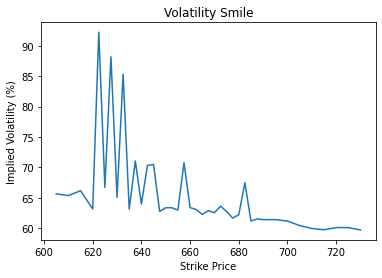

In [14]:
fig = plt.figure()
plt.plot(opt.calls.strike[20:60], impliedvol[20:60], '-')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility (%)')
plt.title('Volatility Smile')

## Term structure of volatility

Volatility term structures list the relationship between implied volatilities and time to expiration.

In [15]:
pip install -U arrow

Requirement already up-to-date: arrow in c:\users\gongh\anaconda3\lib\site-packages (1.0.3)
Note: you may need to restart the kernel to use updated packages.


In [16]:
import arrow
T = ['2021-04-09','2021-04-16','2021-04-23','2021-04-30','2021-05-07',
     '2021-05-21','2021-06-18','2021-07-16','2021-09-17','2021-12-17',
     '2022-01-21','2022-03-18','2022-06-17','2022-09-16','2023-01-20','2023-03-17']

In [17]:
impliedvol_t = np.zeros((len(T),1))
now = arrow.get('2021-04-02')
days = np.zeros((len(T),1))
for j in range(len(T)):
    opt = TESLA.option_chain(T[j])
    temp = arrow.get(T[j])
    delta = temp - now
    days[j] = delta.days
    c = mibian.BS([S, 600, 1.63, days[j]], callPrice = float(opt.calls.lastPrice[opt.calls.strike==600]))
    impliedvol_t [j] = c.impliedVolatility

Text(0.5, 1.0, 'Term structure of volatility')

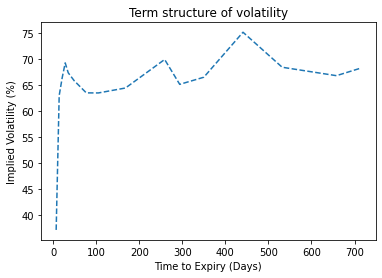

In [18]:
fig = plt.figure()
plt.plot(days, impliedvol_t, '--')
plt.xlabel('Time to Expiry (Days)')
plt.ylabel('Implied Volatility (%)')
plt.title('Term structure of volatility')

## Implied volatility surface

It is often useful to plot implied volatility as a function of both strike price and time to maturity. The result is a two-dimensional curved surface plotted in three dimensions whereby the current market implied volatility (z-axis) for all options on the underlying is plotted against the price (y-axis) and time to maturity (x-axis "DTM"). 

In [19]:
K = np.linspace(500,900,9)

In [20]:
impliedvol_s = np.zeros((len(K),len(days)))
for j in range(len(days)):
    for i in range(len(K)):
        opt = TESLA.option_chain(T[j])
        c = mibian.BS([S, K[i], 1.69, days[j]], callPrice = float(opt.calls.lastPrice[opt.calls.strike == K[i]]))
        impliedvol_s [i,j] = c.impliedVolatility

In [21]:
impliedvol_s

array([[1.19262695e+02, 1.00000000e-05, 8.78906250e+01, 7.81250000e+01,
        9.08203125e+01, 7.21435547e+01, 6.90917969e+01, 7.64770508e+01,
        6.45065308e+01, 6.51969910e+01, 6.76269531e+01, 6.57806396e+01,
        6.57348633e+01, 6.77528381e+01, 6.64405823e+01, 6.88476562e+01],
       [8.78906250e+01, 7.27539062e+01, 1.20361328e+02, 8.60290527e+01,
        6.09283447e+01, 6.71386719e+01, 6.43692017e+01, 6.44226074e+01,
        7.17239380e+01, 6.73217773e+01, 6.77032471e+01, 6.65893555e+01,
        6.60095215e+01, 7.28874207e+01, 7.42149353e+01, 6.75354004e+01],
       [3.71093750e+01, 6.29882812e+01, 6.64062500e+01, 6.92596436e+01,
        6.72607422e+01, 6.58111572e+01, 6.34765625e+01, 6.34536743e+01,
        6.43920898e+01, 6.98852539e+01, 6.50939941e+01, 6.64672852e+01,
        7.51342773e+01, 6.83593750e+01, 6.67457581e+01, 6.82067871e+01],
       [6.34765625e+01, 5.95703125e+01, 6.35986328e+01, 6.55517578e+01,
        6.48193359e+01, 6.36062622e+01, 6.17675781e+01, 6.231

Text(0.5, 1.0, 'Volatility Smile')

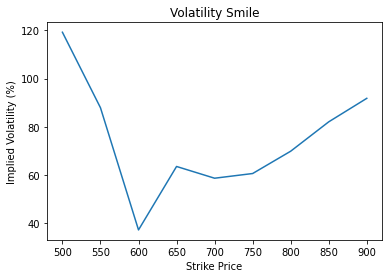

In [22]:
fig = plt.figure()
plt.plot(K, impliedvol_s[:,0], '-')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility (%)')
plt.title('Volatility Smile')

Text(0.5, 1.0, 'Term structure of volatility')

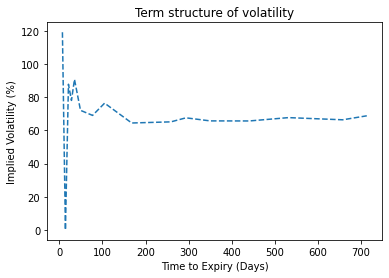

In [23]:
fig = plt.figure()
plt.plot(days, impliedvol_s[0,:], '--')
plt.xlabel('Time to Expiry (Days)')
plt.ylabel('Implied Volatility (%)')
plt.title('Term structure of volatility')

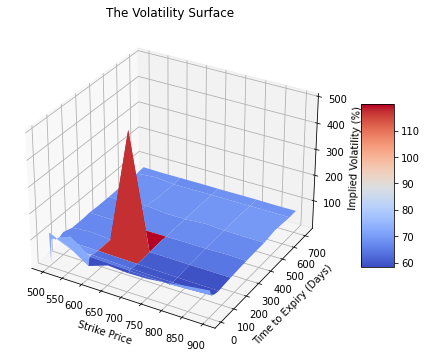

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
K, days = np.meshgrid(K, days)
surf = ax.plot_surface(K, days, impliedvol_s.T, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Time to Expiry (Days)')
ax.set_zlabel('Implied Volatility (%)')
plt.title('The Volatility Surface')
fig.colorbar(surf, shrink=0.5, aspect=5);